# DATOS DE LOS PARTICIPANTES 

## Equipo 1 CSF
1. Nicolás Cisneros Palma - A01029883
2. Jorge Martínez Rodríguez - A01351346
3. Leonardo Chico Reyes - A01029882

In [2]:
# Importar librerias importantes
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.colors as mpl_colors
import sys

#paqueteria para ML
from time import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer
from processing_ORS import *


In [3]:
ors_entidades_df = data_processing()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301522 entries, 0 to 301521
Data columns (total 19 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   TIPO DE INSTITUCION                   301522 non-null  object
 1   FECHA DE CORTE                        301522 non-null  object
 2   RAMO                                  301522 non-null  object
 3   ENTIDAD                               301522 non-null  object
 4   NUMERO DE POLIZAS VIGENTES            301522 non-null  object
 5   RIESGOS ASEGURAADOS                   301522 non-null  object
 6   RIESGOS ASEGURADOS VIGENTES           301522 non-null  object
 7   NUMERO DE SINIESTROS / RECLAMACIONES  301522 non-null  object
 8   PRIMA EMITIDA                         301522 non-null  object
 9   COMISION DIRECTA                      301522 non-null  object
 10  SUMA ASEGURADA                        301522 non-null  object
 11  MONTO DE SINI

In [4]:
ors_entidades_df.info() #visualizamos los tipos de datos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236384 entries, 0 to 301520
Data columns (total 19 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   TIPO DE INSTITUCION                   236384 non-null  object        
 1   FECHA DE CORTE                        236384 non-null  datetime64[ns]
 2   RAMO                                  236384 non-null  object        
 3   ENTIDAD                               236384 non-null  object        
 4   NUMERO DE POLIZAS VIGENTES            236384 non-null  int64         
 5   RIESGOS ASEGURAADOS                   236384 non-null  int64         
 6   RIESGOS ASEGURADOS VIGENTES           236384 non-null  int64         
 7   NUMERO DE SINIESTROS / RECLAMACIONES  236384 non-null  int64         
 8   PRIMA EMITIDA                         236384 non-null  int64         
 9   COMISION DIRECTA                      236384 non-null  int6

In [5]:
#CONVERSION A LOS TIPOS DE DATOS NECESARIOS

# Lista de columnas que se necesitan modificar
no_commas_list = ors_entidades_df.columns[5:-1]

# Quitamos las comas (,) de las columnas para que no interfieran con el parseamiento
# y las convertimos a su representación numérica en punto flotante
ors_entidades_df[no_commas_list] = ors_entidades_df[no_commas_list].apply(lambda column: column.replace('[^0-9\.-]', '', regex=True))

ors_entidades_df

,TIPO DE INSTITUCION,FECHA DE CORTE,RAMO,ENTIDAD,NUMERO DE POLIZAS VIGENTES,RIESGOS ASEGURAADOS,RIESGOS ASEGURADOS VIGENTES,NUMERO DE SINIESTROS / RECLAMACIONES,PRIMA EMITIDA,COMISION DIRECTA,SUMA ASEGURADA,MONTO DE SINIESTRALIDAD,MONTO DE VENCIMIENTOS,MONTO DE RESCATE,AJUSTE DE GASTOS,MONTO DE DIVIDENDOS,MONTO DE SALVAMENTO,MONTO RECUPERADO,AÑO
0,Seguros,2021-04-30,Responsabilidad Civil,Baja California,1,1,0,0,192164,34095,60293400,0,0,0,0,0,0,0,2021
52039,Salud,2021-04-30,Accidentes Personales,San Luis Potosí,31,31,31,0,938,0,1550000,0,0,0,0,0,0,0,2021
52038,Salud,2021-04-30,Accidentes Personales,Quintana Roo,50,50,50,0,1799,0,2500000,0,0,0,0,0,0,0,2021
52037,Salud,2021-04-30,Accidentes Personales,Querétaro,25,25,25,0,642,0,1250000,0,0,0,0,0,0,0,2021
52036,Salud,2021-04-30,Accidentes Personales,Puebla,47,63,63,0,943,0,2350000,0,0,0,0,0,0,0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188140,Seguros,2023-01-31,Responsabilidad Civil,Quintana Roo,13,2,13,0,161125,3650,101739510,0,0,0,0,0,0,0,2023
188141,Seguros,2023-01-31,Responsabilidad Civil,San Luis Potosí,22,2,20,1,456273,86203,245670180,55148,0,0,43,0,0,0,2023
188142,Seguros,2023-01-31,Responsabilidad Civil,Sinaloa,24,2,22,0,102787,18502,283835948,1,0,0,0,0,0,0,2023
188130,Seguros,2023-01-31,Responsabilidad Civil,Hidalgo,14,2,15,0,511488,76723,258405369,0,0,0,0,0,0,0,2023


In [6]:
ors_entidades_df.columns

Index(['TIPO DE INSTITUCION', 'FECHA DE CORTE', 'RAMO', 'ENTIDAD',
       'NUMERO DE POLIZAS VIGENTES', 'RIESGOS ASEGURAADOS',
       'RIESGOS ASEGURADOS VIGENTES', 'NUMERO DE SINIESTROS / RECLAMACIONES',
       'PRIMA EMITIDA', 'COMISION DIRECTA', 'SUMA ASEGURADA',
       'MONTO DE SINIESTRALIDAD', 'MONTO DE VENCIMIENTOS', 'MONTO DE RESCATE',
       'AJUSTE DE GASTOS', 'MONTO DE DIVIDENDOS', 'MONTO DE SALVAMENTO',
       'MONTO RECUPERADO', 'AÑO'],
      dtype='object')

In [7]:
#CONVERSIÓN DE LAS COLUMNAS CATEGORICAS CON INFORMACIÓN ÚTIL

#Vamos a usar la función factorize que hace el mapeo automaticamente

#Guardo los nombres reales de las categorias de cada columan
ors_entidades_df['TIPO DE INSTITUCION'], cat_Tipo_Inst = pd.factorize(ors_entidades_df['TIPO DE INSTITUCION'])
ors_entidades_df['RAMO'], cat_Ramo = pd.factorize(ors_entidades_df['RAMO'])
ors_entidades_df['ENTIDAD'], cat_Entidad_Fed = pd.factorize(ors_entidades_df['ENTIDAD'])



In [8]:
print(cat_Tipo_Inst)
print(cat_Ramo)
print(cat_Entidad_Fed)

Index(['Seguros', 'Salud', 'Pensiones', 'Vivienda', 'Garantía'], dtype='object')
Index(['Responsabilidad Civil', 'Accidentes Personales ', 'Pensiones',
       'Gastos Médicos ', 'Vida',
       'Salud (Incluye Individual Grupo y Colectivo ', 'Automóviles',
       'Diversos Misceláneos', 'Fenómenos Hidrometeorológicos', 'Terremoto',
       'Diversos Ramos Técnicos', 'Caución ', 'Transportes de Mercancías',
       'Cascos Embarcaciones', 'Incendio', 'Crédito', 'Cascos Aeronaves',
       'Agrícola', 'Pecuario', 'Crédito a la Vivienda', 'Garantía Financiera'],
      dtype='object')
Index(['Baja California', 'San Luis Potosí', 'Quintana Roo', 'Querétaro',
       'Puebla', 'Oaxaca', 'Nuevo León', 'Michoacán', 'Estado de México',
       'Jalisco', 'Hidalgo', 'Guerrero', 'Guanajuato', 'Durango',
       'Distrito Federal', 'Chihuahua', 'Chiapas', 'Colima', 'Coahuila',
       'Campeche', 'Aguascalientes', 'Sinaloa', 'Zacatecas', 'Sonora',
       'Tlaxcala', 'Morelos', 'Baja California Sur', 'Yuca

In [9]:
ors_entidades_df

,TIPO DE INSTITUCION,FECHA DE CORTE,RAMO,ENTIDAD,NUMERO DE POLIZAS VIGENTES,RIESGOS ASEGURAADOS,RIESGOS ASEGURADOS VIGENTES,NUMERO DE SINIESTROS / RECLAMACIONES,PRIMA EMITIDA,COMISION DIRECTA,SUMA ASEGURADA,MONTO DE SINIESTRALIDAD,MONTO DE VENCIMIENTOS,MONTO DE RESCATE,AJUSTE DE GASTOS,MONTO DE DIVIDENDOS,MONTO DE SALVAMENTO,MONTO RECUPERADO,AÑO
0,0,2021-04-30,0,0,1,1,0,0,192164,34095,60293400,0,0,0,0,0,0,0,2021
52039,1,2021-04-30,1,1,31,31,31,0,938,0,1550000,0,0,0,0,0,0,0,2021
52038,1,2021-04-30,1,2,50,50,50,0,1799,0,2500000,0,0,0,0,0,0,0,2021
52037,1,2021-04-30,1,3,25,25,25,0,642,0,1250000,0,0,0,0,0,0,0,2021
52036,1,2021-04-30,1,4,47,63,63,0,943,0,2350000,0,0,0,0,0,0,0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188140,0,2023-01-31,0,2,13,2,13,0,161125,3650,101739510,0,0,0,0,0,0,0,2023
188141,0,2023-01-31,0,1,22,2,20,1,456273,86203,245670180,55148,0,0,43,0,0,0,2023
188142,0,2023-01-31,0,21,24,2,22,0,102787,18502,283835948,1,0,0,0,0,0,0,2023
188130,0,2023-01-31,0,10,14,2,15,0,511488,76723,258405369,0,0,0,0,0,0,0,2023


# Para obtener clusters siempre hay que definir una variable que afecte a los datos para encontrar insights relevantes, por lo que nosotros no consideraremos todas las filas que no contengan PRIMA EMITIDA

In [10]:
ors_entidades_df.drop(ors_entidades_df[(ors_entidades_df['PRIMA EMITIDA'] < 1)].index, inplace=True)
ors_entidades_df

,TIPO DE INSTITUCION,FECHA DE CORTE,RAMO,ENTIDAD,NUMERO DE POLIZAS VIGENTES,RIESGOS ASEGURAADOS,RIESGOS ASEGURADOS VIGENTES,NUMERO DE SINIESTROS / RECLAMACIONES,PRIMA EMITIDA,COMISION DIRECTA,SUMA ASEGURADA,MONTO DE SINIESTRALIDAD,MONTO DE VENCIMIENTOS,MONTO DE RESCATE,AJUSTE DE GASTOS,MONTO DE DIVIDENDOS,MONTO DE SALVAMENTO,MONTO RECUPERADO,AÑO
0,0,2021-04-30,0,0,1,1,0,0,192164,34095,60293400,0,0,0,0,0,0,0,2021
52039,1,2021-04-30,1,1,31,31,31,0,938,0,1550000,0,0,0,0,0,0,0,2021
52038,1,2021-04-30,1,2,50,50,50,0,1799,0,2500000,0,0,0,0,0,0,0,2021
52037,1,2021-04-30,1,3,25,25,25,0,642,0,1250000,0,0,0,0,0,0,0,2021
52036,1,2021-04-30,1,4,47,63,63,0,943,0,2350000,0,0,0,0,0,0,0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188140,0,2023-01-31,0,2,13,2,13,0,161125,3650,101739510,0,0,0,0,0,0,0,2023
188141,0,2023-01-31,0,1,22,2,20,1,456273,86203,245670180,55148,0,0,43,0,0,0,2023
188142,0,2023-01-31,0,21,24,2,22,0,102787,18502,283835948,1,0,0,0,0,0,0,2023
188130,0,2023-01-31,0,10,14,2,15,0,511488,76723,258405369,0,0,0,0,0,0,0,2023


In [11]:
ors_entidades_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236384 entries, 0 to 301520
Data columns (total 19 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   TIPO DE INSTITUCION                   236384 non-null  int64         
 1   FECHA DE CORTE                        236384 non-null  datetime64[ns]
 2   RAMO                                  236384 non-null  int64         
 3   ENTIDAD                               236384 non-null  int64         
 4   NUMERO DE POLIZAS VIGENTES            236384 non-null  int64         
 5   RIESGOS ASEGURAADOS                   236384 non-null  int64         
 6   RIESGOS ASEGURADOS VIGENTES           236384 non-null  int64         
 7   NUMERO DE SINIESTROS / RECLAMACIONES  236384 non-null  int64         
 8   PRIMA EMITIDA                         236384 non-null  int64         
 9   COMISION DIRECTA                      236384 non-null  int6

In [12]:
ors_entidades_df.drop(['FECHA DE CORTE'], axis=1, inplace = True) #por el momento no es útil
ors_entidades_df.drop(['AÑO'], axis=1, inplace = True) #por el momento no es útil
ors_entidades_df.drop(['RAMO'], axis=1, inplace = True) #por el momento no es útil
ors_entidades_df.drop(['MONTO DE RESCATE'], axis=1, inplace = True) #por el momento no es útil
ors_entidades_df.head(20)

,TIPO DE INSTITUCION,ENTIDAD,NUMERO DE POLIZAS VIGENTES,RIESGOS ASEGURAADOS,RIESGOS ASEGURADOS VIGENTES,NUMERO DE SINIESTROS / RECLAMACIONES,PRIMA EMITIDA,COMISION DIRECTA,SUMA ASEGURADA,MONTO DE SINIESTRALIDAD,MONTO DE VENCIMIENTOS,AJUSTE DE GASTOS,MONTO DE DIVIDENDOS,MONTO DE SALVAMENTO,MONTO RECUPERADO
0,0,0,1,1,0,0,192164,34095,60293400,0,0,0,0,0,0
52039,1,1,31,31,31,0,938,0,1550000,0,0,0,0,0,0
52038,1,2,50,50,50,0,1799,0,2500000,0,0,0,0,0,0
52037,1,3,25,25,25,0,642,0,1250000,0,0,0,0,0,0
52036,1,4,47,63,63,0,943,0,2350000,0,0,0,0,0,0
52035,1,5,4,4,4,0,444,0,200000,0,0,0,0,0,0
52034,1,6,162,171,171,0,3279,0,8350000,0,0,0,0,0,0
52031,1,7,73,73,73,0,2174,0,3650000,0,0,0,0,0,0
52030,1,8,154,169,169,0,4032,0,8150000,0,0,0,0,0,0
52029,1,9,167,195,195,0,5891,0,9500000,0,0,0,0,0,0


In [13]:
ors_entidades_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236384 entries, 0 to 301520
Data columns (total 15 columns):
 #   Column                                Non-Null Count   Dtype
---  ------                                --------------   -----
 0   TIPO DE INSTITUCION                   236384 non-null  int64
 1   ENTIDAD                               236384 non-null  int64
 2   NUMERO DE POLIZAS VIGENTES            236384 non-null  int64
 3   RIESGOS ASEGURAADOS                   236384 non-null  int64
 4   RIESGOS ASEGURADOS VIGENTES           236384 non-null  int64
 5   NUMERO DE SINIESTROS / RECLAMACIONES  236384 non-null  int64
 6   PRIMA EMITIDA                         236384 non-null  int64
 7   COMISION DIRECTA                      236384 non-null  int64
 8   SUMA ASEGURADA                        236384 non-null  int64
 9   MONTO DE SINIESTRALIDAD               236384 non-null  int64
 10  MONTO DE VENCIMIENTOS                 236384 non-null  int64
 11  AJUSTE DE GASTOS          

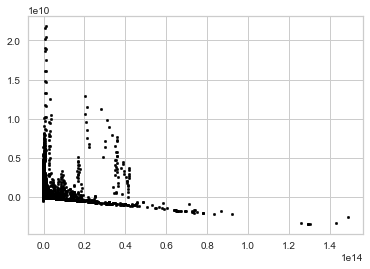

In [14]:
#vamos a reducir la dimensionalidad de estos datos, pues lo usaremos para graficar
pca = PCA(n_components = 2) #solo 2, para poder graficar en el eje X y eje Y
Xshort = pca.fit_transform(ors_entidades_df)
plt.scatter(Xshort[:,0], Xshort[:,1], c='black', s=7)
plt.show()

In [15]:
rescaleX = StandardScaler().fit_transform(ors_entidades_df)
Xescaled = pd.DataFrame(data = rescaleX, columns = ors_entidades_df.columns)
Xescaled

,TIPO DE INSTITUCION,ENTIDAD,NUMERO DE POLIZAS VIGENTES,RIESGOS ASEGURAADOS,RIESGOS ASEGURADOS VIGENTES,NUMERO DE SINIESTROS / RECLAMACIONES,PRIMA EMITIDA,COMISION DIRECTA,SUMA ASEGURADA,MONTO DE SINIESTRALIDAD,MONTO DE VENCIMIENTOS,AJUSTE DE GASTOS,MONTO DE DIVIDENDOS,MONTO DE SALVAMENTO,MONTO RECUPERADO
0,-0.23,-1.65,-0.10,-0.07,-0.08,-0.10,-0.14,-0.11,-0.07,-0.12,-0.05,-0.03,-0.03,-0.08,-0.04
1,2.42,-1.54,-0.10,-0.07,-0.08,-0.10,-0.14,-0.12,-0.07,-0.12,-0.05,-0.03,-0.03,-0.08,-0.04
2,2.42,-1.44,-0.10,-0.07,-0.08,-0.10,-0.14,-0.12,-0.07,-0.12,-0.05,-0.03,-0.03,-0.08,-0.04
3,2.42,-1.33,-0.10,-0.07,-0.08,-0.10,-0.14,-0.12,-0.07,-0.12,-0.05,-0.03,-0.03,-0.08,-0.04
4,2.42,-1.22,-0.10,-0.07,-0.08,-0.10,-0.14,-0.12,-0.07,-0.12,-0.05,-0.03,-0.03,-0.08,-0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236379,-0.23,-1.44,-0.10,-0.07,-0.08,-0.10,-0.14,-0.12,-0.07,-0.12,-0.05,-0.03,-0.03,-0.08,-0.04
236380,-0.23,-1.54,-0.10,-0.07,-0.08,-0.10,-0.14,-0.11,-0.07,-0.12,-0.05,-0.03,-0.03,-0.08,-0.04
236381,-0.23,0.59,-0.10,-0.07,-0.08,-0.10,-0.14,-0.11,-0.07,-0.12,-0.05,-0.03,-0.03,-0.08,-0.04
236382,-0.23,-0.58,-0.10,-0.07,-0.08,-0.10,-0.14,-0.11,-0.07,-0.12,-0.05,-0.03,-0.03,-0.08,-0.04


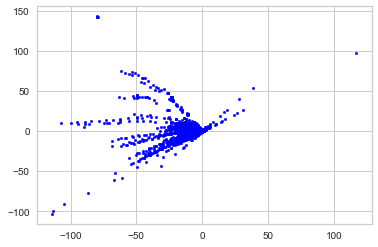

In [16]:
#vamos a reducir la dimensionalidad de estos datos, pues lo usaremos para graficar
pca = PCA(n_components = 2) #solo 2, para poder graficar en el eje X y eje Y
Xescaled_short = pca.fit_transform(Xescaled)
plt.scatter(Xescaled_short[:,0], Xescaled_short[:,1], c='blue', s=7)
plt.show()

In [17]:
#n_clusters: número de gruos a serem creados
#n_init: número de repeticiones del algoritmo
K = 5
kmeans_gral = KMeans(n_clusters=K, random_state=0, n_init=50).fit(Xescaled)
kmeans_gral.labels_ #grupos a los cuales cada elemeto 


array([0, 4, 4, ..., 0, 0, 0], dtype=int32)

In [18]:
kmeans_gral.cluster_centers_

array([[-2.29775516e-01,  5.29091398e-03, -2.49603634e-02,
        -2.75692277e-02, -2.83934104e-02, -6.94029856e-02,
        -5.80912437e-02, -4.23036402e-02, -1.97912001e-02,
        -5.75517635e-02, -2.14181768e-02, -1.09369583e-02,
        -2.18089524e-02, -3.73313608e-02, -2.32856764e-02],
       [-2.29775516e-01, -3.54593133e-01,  4.72403031e+00,
         4.83107192e+00,  4.96320589e+00,  1.59125897e+01,
         2.29012534e+01,  2.38911798e+01,  4.34464517e+00,
         2.68914141e+01,  3.34837095e+00,  8.85014123e+00,
         7.33851366e+00,  1.76046500e+01,  1.20235663e+01],
       [-2.29775516e-01, -7.22646889e-02,  2.25215987e+01,
         3.94985558e+01,  3.93598677e+01,  4.15630699e-01,
         5.32829362e+00,  4.33104597e+00,  5.29892999e+00,
         1.21878254e+00,  1.88657956e+01,  3.93615944e-02,
         8.58049636e-01, -7.69652988e-02, -3.48214093e-02],
       [ 1.60216073e-01, -3.90655036e-01,  2.04687423e+00,
         1.31771875e+00,  1.43851219e+00,  4.45898337

In [19]:
pca = PCA(n_components = 2) #solo 2, para poder graficar en el eje X y eje Y
Xcenters = pca.fit_transform(kmeans_gral.cluster_centers_)
Xcenters

array([[-12.76476303, -15.76460703],
       [-12.0296326 ,  36.85235456],
       [ 49.01994864,  -0.35819061],
       [-11.32233968,  -4.95333532],
       [-12.90321333, -15.7762216 ]])

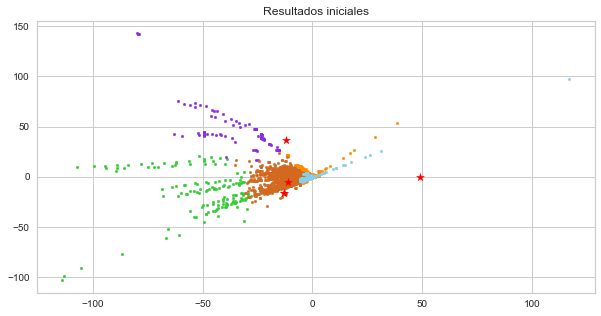

In [20]:
#vamos a visualizar los resultados

colors = ['darkorange', 'limegreen', 'blueviolet', 'chocolate', 'skyblue', 'tab:pink', 'tab:orange'] #ver más en: https://matplotlib.org/stable/gallery/color/named_colors.html
fig, ax = plt.subplots(figsize=(10, 5))

#graficamos los datos, cada uno con un color diferente representando un cluster
for i in range(K):
  points = np.array([Xescaled_short[j] for j in range (len(Xescaled_short)) if kmeans_gral.labels_[j] == i]) 
  ax.scatter(points[:,0], points[:,1], s=7, c = colors[i])

#graficamos los centros de los clusters
ax.scatter(Xcenters[:,0], Xcenters[:,1], marker='*',s=70, c='red')

plt.title("Resultados iniciales")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


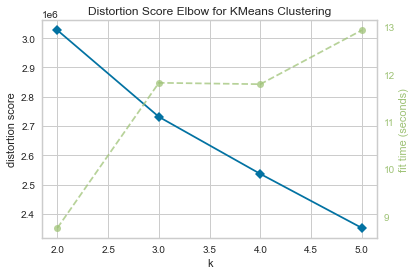

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
#usar el metodo Elbow para determinar el mejor K

visualizer = KElbowVisualizer(kmeans_gral, k=(2,6))

visualizer.fit(Xescaled)        
visualizer.show()        

# Observaciones generales
1. Reducción de dimensionalidad: El PCA reduce la dimensionalidad del conjunto de datos original al proyectarlo en un espacio de menor dimensión. Esto permite visualizar y analizar los datos de manera más efectiva.

2. Varianza explicada: Cada componente principal en PCA representa una combinación lineal de las variables originales. La varianza explicada por cada componente principal indica cuánta información se conserva al proyectar los datos en ese eje.

3. Distancia entre puntos: Los clusters formados en el espacio de menor dimensión indican grupos de puntos que tienen características similares. La distancia entre los puntos dentro de un cluster y la distancia entre los clusters pueden proporcionar información sobre la similitud o la diferencia entre los grupos.

4. Interpretación de componentes: Los componentes principales pueden interpretarse como direcciones en el espacio original de las variables originales. Los coeficientes de los componentes principales indican la contribución relativa de cada variable original en la formación del componente principal. Esto puede ayudar a identificar las características más relevantes o significativas para cada cluster.

# Observaciones particulares
1. Pérdida de información: El PCA puede haber reducido la dimensionalidad del conjunto de datos pero al mismo tiempo puede haber perdido información crucial para la formación de clusters distintos. Esto puede ocurrir cuando los componentes principales no son capaces de capturar la variabilidad suficiente en los datos o cuando la variabilidad no está bien representada en las primeras componentes principales.

2. Baja variabilidad entre observaciones: Es posible que las observaciones en el conjunto de datos sean muy similares entre sí en todas las dimensiones consideradas. Si las diferencias o variaciones entre las observaciones son mínimas, puede resultar difícil encontrar una estructura clara de clusters después de aplicar PCA.

3. Interacciones complejas: Si las relaciones entre las variables originales son altamente no lineales o si existen interacciones complejas entre las variables, el PCA puede no ser capaz de capturar esas relaciones de manera efectiva. Esto puede resultar en clusters poco distintos o en la formación de un único cluster.

4. Dimensionalidad insuficiente: La dimensionalidad reducida después de aplicar PCA puede no ser suficiente para capturar la estructura de los datos de manera adecuada. En algunos casos, es posible que se necesite una mayor cantidad de componentes principales para obtener clusters significativos y distinguibles.